# MA428 Numerical Analysis Project 1
## Dirichlet Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math
import sys

<img src="images/ma428_p1_intro.png"/>

### 1(a)
<img src="images/ma428_p1_1a.png"/>
<img src="images/ma428_p1_1a_ans.png"/>
The graph paper grid lines do not show up very well--sorry!

### 1(b)
<img src="images/ma428_p1_1b.png"/>
<img src="images/ma428_p1_1b_ans.png"/>

### 1(c)
<img src="images/ma428_p1_1c.png"/>

In [2]:
def grid_generator(p):
    h = 1 / (2**p)  # calculate specified grid size
    h_squared = h**2
    
    # calculate number of indices that can fit in the bottom block (where 0<y<2)
    block1_row_indices = 5 / h - 1
    block1_column_indices = 2 / h - 1
    block1_indices = block1_row_indices * block1_column_indices
    
    # calculate number of indices that can fit in the middle block (where 2<=y<3)
    block2_row_indices = 3 / h - 1
    block2_column_indices = 1 / h
    block2_indices = block2_row_indices * block2_column_indices
    
    # calculate number of indices that can fit in the top block (where 3<=y<4)
    block3_row_indices = 2 / h - 1
    block3_column_indices = 1 / h
    block3_indices = block3_row_indices * block3_column_indices
    
    matrix_indices = int(block1_indices + block2_indices + block3_indices)
    
    level_boundaries = {}
    for i in range(0, int(matrix_indices)):
        if block1_column_indices > 0:
            level_boundaries[i] = int(block1_row_indices)
            block1_column_indices -= 1
        elif block2_column_indices > 0:
            level_boundaries[i] = int(block2_row_indices)
            block2_column_indices -= 1
        elif block3_column_indices > 0:
            level_boundaries[i] = int(block3_row_indices)
            block3_column_indices -= 1
    print('number of points in each \'level\' of domain: ' + str(level_boundaries))
    
    
    # A matrix
    A = []
    
    # loop through each 'u'
    for i in range(0, matrix_indices):
        u = []
        
        counter = 0
        for row in range(0, len(level_boundaries)):
            items_in_row = level_boundaries[row]
            for j in range(0, items_in_row):
                if counter == i:                                       # current position
                    u.append(4/h_squared)   
                elif counter+1 == i and j+1 < items_in_row:            # left neighbor
                    u.append(-1/h_squared)
                elif counter-1 == i and j > 0:                         # right neighbor
                    u.append(-1/h_squared)
                elif row > 0 and counter-level_boundaries[row-1] == i: # upstairs neighbor
                    u.append(-1/h_squared)
                elif row < len(level_boundaries)-1 and \
                        j < level_boundaries[row+1] and \
                        counter+level_boundaries[row] == i:            # downstairs neighbor
                            u.append(-1/h_squared)
                else:
                    u.append(0)
                counter += 1 
            
        A.append(u)
        
    
    return np.matrix(A)

In [3]:
a = grid_generator(2)
print(a)
print('dimensions of matrix: ' + str(np.shape(a)))

number of points in each 'level' of domain: {0: 19, 1: 19, 2: 19, 3: 19, 4: 19, 5: 19, 6: 19, 7: 11, 8: 11, 9: 11, 10: 11, 11: 7, 12: 7, 13: 7, 14: 7}
[[ 64. -16.   0. ...   0.   0.   0.]
 [-16.  64. -16. ...   0.   0.   0.]
 [  0. -16.  64. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  64. -16.   0.]
 [  0.   0.   0. ... -16.  64. -16.]
 [  0.   0.   0. ...   0. -16.  64.]]
dimensions of matrix: (205, 205)


### 1(d)
<img src="images/ma428_p1_1d.png"/>

* Using h=1/2^0

number of points in each 'level' of domain: {0: 4, 1: 2, 2: 1}
dimensions of matrix: (7, 7)


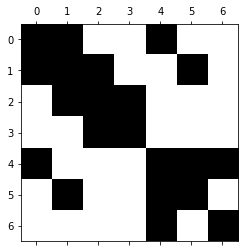

In [4]:
A = grid_generator(0)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^1

number of points in each 'level' of domain: {0: 9, 1: 9, 2: 9, 3: 5, 4: 5, 5: 3, 6: 3}
dimensions of matrix: (43, 43)


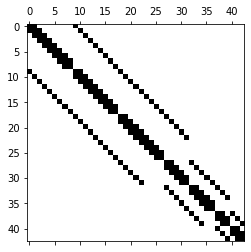

In [5]:
A = grid_generator(1)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^2

number of points in each 'level' of domain: {0: 19, 1: 19, 2: 19, 3: 19, 4: 19, 5: 19, 6: 19, 7: 11, 8: 11, 9: 11, 10: 11, 11: 7, 12: 7, 13: 7, 14: 7}
dimensions of matrix: (205, 205)


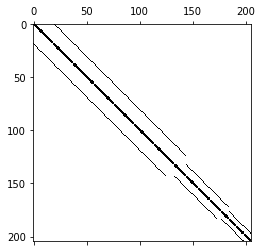

In [6]:
A = grid_generator(2)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^3

number of points in each 'level' of domain: {0: 39, 1: 39, 2: 39, 3: 39, 4: 39, 5: 39, 6: 39, 7: 39, 8: 39, 9: 39, 10: 39, 11: 39, 12: 39, 13: 39, 14: 39, 15: 23, 16: 23, 17: 23, 18: 23, 19: 23, 20: 23, 21: 23, 22: 23, 23: 15, 24: 15, 25: 15, 26: 15, 27: 15, 28: 15, 29: 15, 30: 15}
dimensions of matrix: (889, 889)


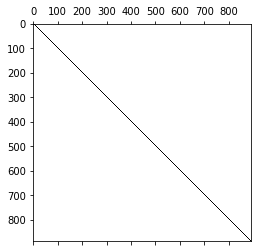

In [7]:
A = grid_generator(3)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^4 ~ takes about 35 seconds on my machine (Macbook 2016 m3, 8gb ram)

number of points in each 'level' of domain: {0: 79, 1: 79, 2: 79, 3: 79, 4: 79, 5: 79, 6: 79, 7: 79, 8: 79, 9: 79, 10: 79, 11: 79, 12: 79, 13: 79, 14: 79, 15: 79, 16: 79, 17: 79, 18: 79, 19: 79, 20: 79, 21: 79, 22: 79, 23: 79, 24: 79, 25: 79, 26: 79, 27: 79, 28: 79, 29: 79, 30: 79, 31: 47, 32: 47, 33: 47, 34: 47, 35: 47, 36: 47, 37: 47, 38: 47, 39: 47, 40: 47, 41: 47, 42: 47, 43: 47, 44: 47, 45: 47, 46: 47, 47: 31, 48: 31, 49: 31, 50: 31, 51: 31, 52: 31, 53: 31, 54: 31, 55: 31, 56: 31, 57: 31, 58: 31, 59: 31, 60: 31, 61: 31, 62: 31}
dimensions of matrix: (3697, 3697)


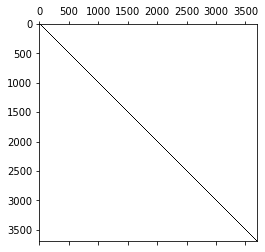

In [8]:
A = grid_generator(4)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^5 ~ takes 4 minutes, 11 seconds on my machine (Macbook 2016 m3, 8gb ram)

In [ ]:
A = grid_generator(5)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

###### Commentary
As the grid size becomes smaller, the grid becomes 'smoother' as can be seen by the above output. We can imagine the reasoning of this because each row in the matrix has at most 5 non-zero entries (current position, left and right neighbor, upstairs and downstairs neighbor). 

However, this smoothing functionality requires a great amount of computational power--even for this small domain. Imagine much larger domains like city maps or airplane blueprints and we are limited to the amount of smoothness we can acheive. 

-----
### 2
<img src="images/ma428_p1_2.png"/>

In [16]:
# flag to print out static image of plot
%matplotlib inline
# flag to display interactive module of plot
# %matplotlib notebook

In [17]:
# map indices to x and y coordinates
def map_indices(p):
    h = 1 / (2**p)  # calculate specified grid size
    
    # calculate number of indices that can fit in the bottom block (where 0<y<2)
    block1_row_indices = 5 / h - 1
    block1_column_indices = 2 / h - 1
    block1_indices = block1_row_indices * block1_column_indices
    
    # calculate number of indices that can fit in the middle block (where 2<=y<3)
    block2_row_indices = 3 / h - 1
    block2_column_indices = 1 / h
    block2_indices = block2_row_indices * block2_column_indices
    
    # calculate number of indices that can fit in the top block (where 3<=y<4)
    block3_row_indices = 2 / h - 1
    block3_column_indices = 1 / h
    block3_indices = block3_row_indices * block3_column_indices
    
    matrix_indices = int(block1_indices + block2_indices + block3_indices)
    
    level_boundaries = {}
    for i in range(0, int(matrix_indices)):
        if block1_column_indices > 0:
            level_boundaries[i] = int(block1_row_indices)
            block1_column_indices -= 1
        elif block2_column_indices > 0:
            level_boundaries[i] = int(block2_row_indices)
            block2_column_indices -= 1
        elif block3_column_indices > 0:
            level_boundaries[i] = int(block3_row_indices)
            block3_column_indices -= 1
    
    
    # list to track indices
    indices = []
    
    # loop through each 'u'
    x_coord = h
    y_coord = h
    level_counter = 0
    level_current_level = 0
    for i in range(0, matrix_indices):
        u = []
        if level_counter >= level_boundaries[level_current_level]:  # check if we need to move up a row in domain
            level_current_level += 1
            level_counter = 0
            x_coord = h
            y_coord += h
            
        u.append(x_coord)  # append x and y coordinates
        u.append(y_coord)
        x_coord += h       # increment x coordinate
        level_counter += 1 # keep track of how many indices are left in row
        indices.append(u)  # add this indice to the list of indices
        
    return indices

# get the limits of the domain
# We're basically just drawing the domain here
def map_domain_coord(p):
    h = 1 / (2**p)  # calculate specified grid size
    coords = []
    x = 0
    y = 0
    while x < 5:
        coords.append([x, y, 0])
        x += h
    
    while y < 2:
        coords.append([x, y, 0])
        y += h
    
    while x > 3:
        coords.append([x, y, 0])
        x -= h
    
    while y < 3:
        coords.append([x, y, 0])
        y += h
    
    while x > 2:
        coords.append([x, y, 0])
        x -= h
    
    while y < 4:
        coords.append([x, y, 0])
        y += h
    
    while x > 0:
        coords.append([x, y, 0])
        x -= h
    
    while y >= 0:
        coords.append([x, y, 0])
        y -= h
        
    coords = pd.DataFrame(coords)
    coords.columns = ['x', 'y', 'z']
    return coords

##### First Function
<img src="images/ma_428_p1_2func1.png"/>

In [18]:
# first function in given prompt
def function_one(indices):
    df = pd.DataFrame(indices)
    df['f_result'] = df[0]*np.exp(-1*df[0]**2 - df[1]**2 + 3*df[0]*df[1])
    return df['f_result']

number of points in each 'level' of domain: {0: 79, 1: 79, 2: 79, 3: 79, 4: 79, 5: 79, 6: 79, 7: 79, 8: 79, 9: 79, 10: 79, 11: 79, 12: 79, 13: 79, 14: 79, 15: 79, 16: 79, 17: 79, 18: 79, 19: 79, 20: 79, 21: 79, 22: 79, 23: 79, 24: 79, 25: 79, 26: 79, 27: 79, 28: 79, 29: 79, 30: 79, 31: 47, 32: 47, 33: 47, 34: 47, 35: 47, 36: 47, 37: 47, 38: 47, 39: 47, 40: 47, 41: 47, 42: 47, 43: 47, 44: 47, 45: 47, 46: 47, 47: 31, 48: 31, 49: 31, 50: 31, 51: 31, 52: 31, 53: 31, 54: 31, 55: 31, 56: 31, 57: 31, 58: 31, 59: 31, 60: 31, 61: 31, 62: 31}


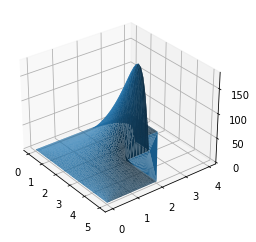

In [19]:
# perform guassian elimination on u = A^-1 * b
p = 4                            # size of grid
A = grid_generator(p)            # grid generator
indices = map_indices(p)         # save the list of indices in the domain
func1_xy = function_one(indices) # calculate the f(x,y) using the list of indices
z = np.linalg.solve(A, func1_xy) # perform gausian elimination and get z-coordinates

# prepare x, y, and z coordinates for matplotlib
df_plot = pd.DataFrame(indices)
df_plot['z'] = z
df_plot.columns = ['x', 'y', 'z']
df_plot = pd.concat([df_plot, map_domain_coord(p)]) # add 'domain coordinates' -- allows us to draw figure down to z=0 boundary

# plot figure using matplot lib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_plot['x'], df_plot['y'], df_plot['z'])
ax.view_init(elev=30, azim=-37.5)
plt.show()

##### Second Function
<img src="images/ma_428_p1_2func2.png"/>

In [20]:
# second function in given prompt
def function_two(indices):
    df = pd.DataFrame(indices)
    df['f_result'] = df[0]*(df[0]*4 - df[1])**3
    return df['f_result']

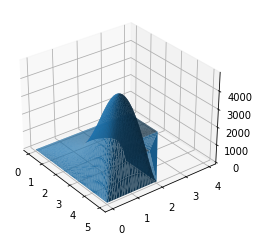

In [21]:
# perform guassian elimination on u = A^-1 * b
p = 4                            # size of grid
A = grid_generator(p)            # grid generator
indices = map_indices(p)         # save the list of indices in the domain
func2_xy = function_two(indices) # calculate the f(x,y) using the list of indices
z = np.linalg.solve(A, func2_xy) # perform gausian elimination and get z-coordinates

# prepare x, y, and z coordinates for matplotlib
df_plot = pd.DataFrame(indices)
df_plot['z'] = z
df_plot.columns = ['x', 'y', 'z']
df_plot = pd.concat([df_plot, map_domain_coord(p)]) # add 'domain coordinates' -- allows us to draw figure down to z=0 boundary

# plot figure using matplot lib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_plot['x'], df_plot['y'], df_plot['z'])
ax.view_init(elev=30, azim=-37.5)
plt.show()